### TF2.0 신경망 만들기
* fashion2.0 데이터 셋을 이용한 신경망 만들기
* 개발 환경 : tf 버전 2.0 

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [4]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


![Google's logo](https://www.google.com/images/logos/google_logo_41.png)

### Fashion MNIST DataSet

![fashion_MNIST]( https://miro.medium.com/max/2220/1*yq2a2Iwms35TuaPqrUeTsA.png )

In [5]:
fashion_mnist = keras.datasets.fashion_mnist


# 4개의 데이터 셋 반환(numpy 배열)
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
print("학습용 데이터 : x: {}, y:{}".format(train_images.shape, train_labels.shape) )
print("테스트 데이터 : x: {}, y:{}".format(test_images.shape, test_labels.shape) )

학습용 데이터 : x: (60000, 28, 28), y:(60000,)
테스트 데이터 : x: (10000, 28, 28), y:(10000,)


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
print("학습용 데이터의 레이블 ", np.unique(train_labels) )

학습용 데이터의 레이블  [0 1 2 3 4 5 6 7 8 9]


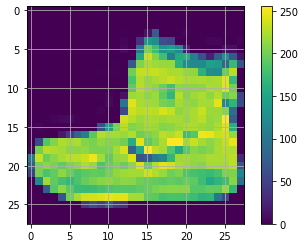

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()   
plt.grid(True)   # grid 선 
plt.show()

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

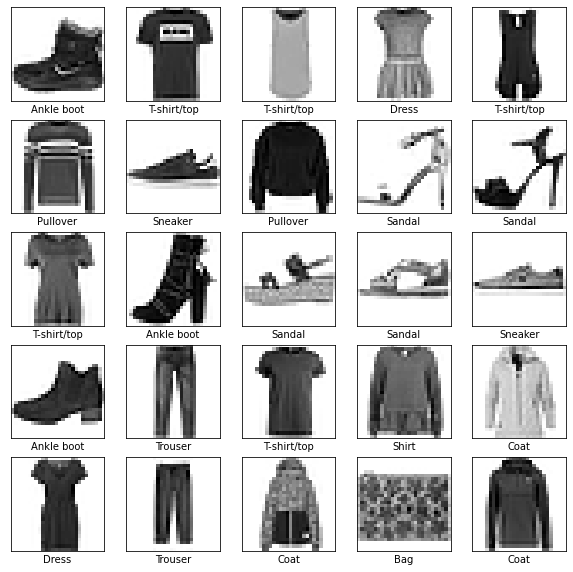

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 98us/sample - loss: 0.4990 - accuracy: 0.8242
Epoch 2/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3731 - accuracy: 0.8650
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3351 - accuracy: 0.8769
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3126 - accuracy: 0.8848
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2953 - accuracy: 0.8896
10000/10000 - 1s - loss: 0.3462 - accuracy: 0.8797

테스트 정확도: 0.8797


### 예측하기
* 훈련된 모델을 사용하여 이미지에 대한 예측 해보기
* 테스트 세트에 대한 각 이미지의 레이블을 예측. 10개의 숫자배열로 나타난다.

In [0]:
predictions = model.predict(test_images)

In [15]:
predictions[0]

array([9.1914126e-07, 4.7569726e-09, 3.5405090e-08, 2.7813265e-08,
       1.4209671e-07, 7.1868097e-04, 4.0797150e-07, 1.7224099e-02,
       1.6000868e-05, 9.8203963e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

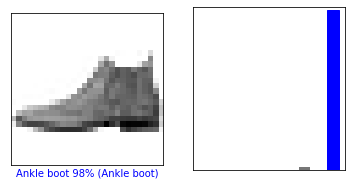

In [19]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

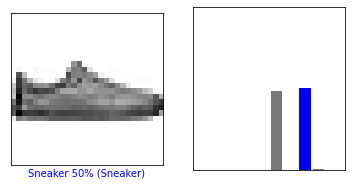

In [20]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

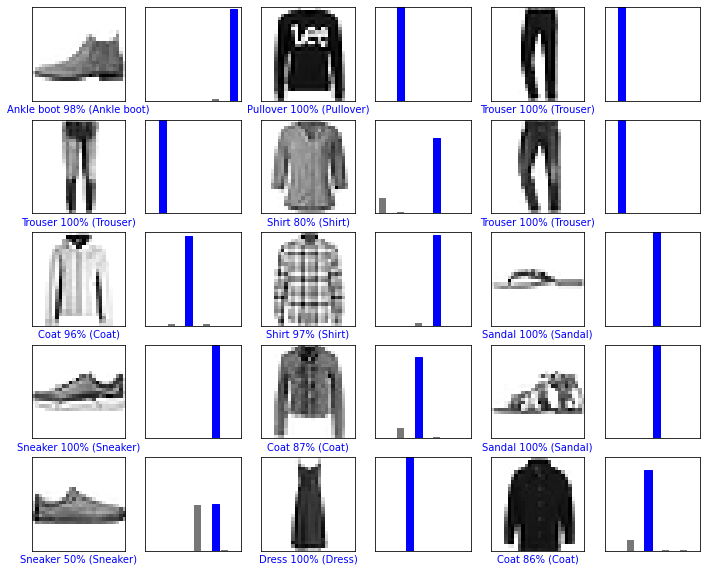

In [21]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

### 이미지 하나 예측해 보기 예측

In [22]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]
print(img.shape)

# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))
print(img.shape)

(28, 28)
(1, 28, 28)


[[9.1914205e-07 4.7569726e-09 3.5405090e-08 2.7813318e-08 1.4209671e-07
  7.1868137e-04 4.0797264e-07 1.7224126e-02 1.6000882e-05 9.8203963e-01]]


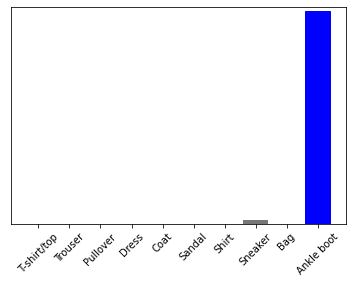

In [23]:
predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [24]:
idx = np.argmax(predictions_single[0])
print(idx)
print(class_names[idx])

9
Ankle boot


```
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.
```

### REF
* fashion 2.0 TF : https://www.tensorflow.org/tutorials/keras/classification